In [1]:
# LOAD JSONS   train_data e test_data

import json
import pandas as pd
import os

# --- Define the path to our data ---
train_file_path = 'train.jsonl'
test_file_path  = 'test.jsonl'

train_data = []
test_data  = []

# --- Load TRAIN data ---
print(f"📦 Loading data from '{train_file_path}'...")
try:
    with open(train_file_path, 'r') as f:
        for line in f:
            train_data.append(json.loads(line))
    print(f"✅ Successfully loaded {len(train_data)} battles from train.")
    
    # Show structure of first train battle
    if train_data:
        print("\n--- Structure of the first train battle: ---")
        first_battle = train_data[0]
        battle_for_display = first_battle.copy()
        battle_for_display['battle_timeline'] = first_battle.get('battle_timeline', [])[:2]
        print(json.dumps(battle_for_display, indent=4))
        if len(first_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")

except FileNotFoundError:
    print(f"❌ ERROR: Could not find the training file at '{train_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")


# --- Load TEST data ---
print(f"\n📦 Loading data from '{test_file_path}'...")
try:
    with open(test_file_path, 'r') as f:
        for line in f:
            test_data.append(json.loads(line))
    print(f"✅ Successfully loaded {len(test_data)} battles from test.")
    
    # Optional: inspect the first test battle
    if test_data:
        print("\n--- Structure of the first test battle: ---")
        first_test_battle = test_data[0]
        test_display = first_test_battle.copy()
        test_display['battle_timeline'] = test_display.get('battle_timeline', [])[:2]
        print(json.dumps(test_display, indent=4))
        if len(first_test_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")

except FileNotFoundError:
    print(f"❌ ERROR: Could not find the test file at '{test_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")


📦 Loading data from 'train.jsonl'...
✅ Successfully loaded 10000 battles from train.

--- Structure of the first train battle: ---
{
    "player_won": true,
    "p1_team_details": [
        {
            "name": "starmie",
            "level": 100,
            "types": [
                "psychic",
                "water"
            ],
            "base_hp": 60,
            "base_atk": 75,
            "base_def": 85,
            "base_spa": 100,
            "base_spd": 100,
            "base_spe": 115
        },
        {
            "name": "exeggutor",
            "level": 100,
            "types": [
                "grass",
                "psychic"
            ],
            "base_hp": 95,
            "base_atk": 95,
            "base_def": 85,
            "base_spa": 125,
            "base_spd": 125,
            "base_spe": 55
        },
        {
            "name": "chansey",
            "level": 100,
            "types": [
                "normal",
                "notype"
    

In [2]:
#Per vedere i dati in dataframe, divisi in 4 blocchi dove squadra==p1 e pokemon==p2
import pandas as pd

def create_dataframe(data):
    # DataFrame generale con info di base
    df_battle = pd.DataFrame([{
        "battle_id": b["battle_id"],
        "player_won": b.get("player_won", None)  # nel test non esiste
    } for b in data])

    # DataFrame con i Pokémon della squadra del giocatore (p1_team_details)
    df_squad = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "name": p["name"],
            "level": p["level"],
            "types": p["types"],
            "base_hp": p["base_hp"],
            "base_atk": p["base_atk"],
            "base_def": p["base_def"],
            "base_spa": p["base_spa"],
            "base_spd": p["base_spd"],
            "base_spe": p["base_spe"]
        }
        for b in data
        for p in b["p1_team_details"]
    ])

    # DataFrame con dettagli del lead Pokémon dell'avversario
    df_pokemon = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "name": b["p2_lead_details"]["name"],
            "level": b["p2_lead_details"]["level"],
            "types": b["p2_lead_details"]["types"],
            "base_hp": b["p2_lead_details"]["base_hp"],
            "base_atk": b["p2_lead_details"]["base_atk"],
            "base_def": b["p2_lead_details"]["base_def"],
            "base_spa": b["p2_lead_details"]["base_spa"],
            "base_spd": b["p2_lead_details"]["base_spd"],
            "base_spe": b["p2_lead_details"]["base_spe"]
        }
        for b in data
    ])

    # DataFrame con la timeline dei turni
    df_battle_timeline = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "turn": t["turn"],
            "p1_pokemon": t["p1_pokemon_state"]["name"],
            "p1_hp": t["p1_pokemon_state"]["hp_pct"],
            "p1_status": t["p1_pokemon_state"]["status"],
            "p1_effects": t["p1_pokemon_state"]["effects"],
            "p1_boosts": t["p1_pokemon_state"]["boosts"],
            "p2_pokemon": t["p2_pokemon_state"]["name"],
            "p2_hp": t["p2_pokemon_state"]["hp_pct"],
            "p2_status": t["p2_pokemon_state"]["status"],
            "p2_effects": t["p2_pokemon_state"]["effects"],
            "p2_boosts": t["p2_pokemon_state"]["boosts"],
            "p1_move_name": t["p1_move_details"]["name"] if t["p1_move_details"] else None,
            "p1_move_type": t["p1_move_details"]["type"] if t["p1_move_details"] else None,
            "p1_move_cat": t["p1_move_details"]["category"] if t["p1_move_details"] else None,
            "p1_move_basepow": t["p1_move_details"]["base_power"] if t["p1_move_details"] else None,
            "p1_move_acc": t["p1_move_details"]["accuracy"] if t["p1_move_details"] else None,
            "p1_move_priority": t["p1_move_details"]["priority"] if t["p1_move_details"] else None,
            "p2_move_name": t["p2_move_details"]["name"] if t["p2_move_details"] else None,
            "p2_move_type": t["p2_move_details"]["type"] if t["p2_move_details"] else None,
            "p2_move_cat": t["p2_move_details"]["category"] if t["p2_move_details"] else None,
            "p2_move_basepow": t["p2_move_details"]["base_power"] if t["p2_move_details"] else None,
            "p2_move_acc": t["p2_move_details"]["accuracy"] if t["p2_move_details"] else None,
            "p2_move_priority": t["p2_move_details"]["priority"] if t["p2_move_details"] else None
        }
        for b in data
        for t in b["battle_timeline"]
    ])

    return [df_battle, df_squad, df_pokemon, df_battle_timeline]

#train_data e test_data
#battle,squad,pokemon,timeline
train_list=create_dataframe(train_data)
test_list=create_dataframe(test_data)

MODELLO STATICO

Funzioni utili

In [3]:
#Create pokedex
def create_pokedex():
    df_list=train_list
    df_squad=df_list[1]
    df_pokemon=df_list[2]
    df_all_pokemon = pd.concat([df_squad, df_pokemon], ignore_index=True)
    df_all_pokemon["types"] = df_all_pokemon["types"].apply(lambda x: tuple(x) if isinstance(x, list) else x)

    # Mantieni solo Pokémon unici per nome (se stessi nomi → stessi tipi e stats)
    df_all_pokemon = (
        df_all_pokemon.drop_duplicates(subset=["name", "types"])
        .reset_index(drop=True)
    )
    #print(f"Pokedex creato con {len(df_all_pokemon)} Pokémon unici ")
    return df_all_pokemon[["name", "types"]]
#print(create_pokedex())

In [4]:
#Funzione per ottenere i tipi dei pokemon(UNICI)
def unique_t(lista):
    df_pokemon=lista[2]
    df_squad=lista[1]
    unique_types = sorted(
        set(
            t
            for types_list in pd.concat([df_pokemon["types"], df_squad["types"]])
            for t in types_list
        )
    )
    return unique_types

In [5]:
#Codice che tramite battle timeline prende il tipo per ogni pokemon della seconda squadra
def tipiSquadra2(df,lista):
    df_pokedex=create_pokedex()
    df_battle_timeline=train_list[3]

    # --- Itera su ogni battaglia ---
    for battle_id in df["battle_id"].unique():
        #Ottieni la lista di Pokémon P2 in quella battaglia
        p2_pokemon_list = (
            df_battle_timeline.loc[df_battle_timeline["battle_id"] == battle_id, "p2_pokemon"]
            .dropna()
            .unique()
            .tolist()
        )
        # Filtra il pokedex per quei Pokémon
        df_p2_pokemons = df_pokedex[df_pokedex["name"].isin(p2_pokemon_list)].copy()
        types_list = [t for types in df_p2_pokemons["types"] for t in types if t != "notype"]
        # Aggiorna la riga corrispondente nel dataframe df
        for elem in types_list:
            col = f"p2_{elem}"
            if col in df.columns:  # aggiorna solo se la colonna esiste
                df.loc[df["battle_id"] == battle_id, col] += 1
    return df
        

Codice finale

In [6]:
import pandas as pd

def extract_feature_diff(lista,isTrain):
    df_battle = lista[0]
    df_pokemon = lista[2]
    df_squad = lista[1]

    unique_types = unique_t(lista)  # funzione che restituisce tutti i tipi unici

    # --- PLAYER 1 ---
    df_squad["types_clean"] = df_squad["types"].apply(lambda x: [t for t in x if t != "notype"])
    agg_squad1 = df_squad.groupby("battle_id").agg({
        "base_hp": "mean",
        "base_atk": "mean",
        "base_def": "mean",
        "base_spa": "mean",
        "base_spd": "mean",
        "base_spe": "mean",
        "level": "mean",
        "types_clean": lambda lst: [t for sub in lst for t in sub]
    }).reset_index()

    for t in unique_types:
        agg_squad1[t] = agg_squad1["types_clean"].apply(lambda lst: lst.count(t))

    agg_squad1 = (
        agg_squad1
        .drop(columns=["types_clean"])
        .add_prefix("p1_")
        .rename(columns={"p1_battle_id": "battle_id"})
    )

    # --- PLAYER 2 ---
    df_squad2 = df_pokemon.copy()
    df_squad2["types_clean"] = df_squad2["types"].apply(lambda x: [t for t in x if t != "notype"])
    for t in unique_types:
        df_squad2[t] = df_squad2["types_clean"].apply(lambda lst: lst.count(t))

    df_squad2 = df_squad2.drop(columns=["types_clean", "types", "name"], errors="ignore")
    agg_squad2 = df_squad2.add_prefix("p2_").rename(columns={"p2_battle_id": "battle_id"})

    # --- UNIONE FINALE ---
    agg_full = agg_squad1.merge(agg_squad2, on="battle_id", how="inner")
    agg_full = agg_full.merge(df_battle[["battle_id", "player_won"]], on="battle_id", how="left")
    
    #controllo per evitare errori durante test
    # Se il dataset è di train, converti la colonna; se è di test, lasciala così
    if isTrain:
        agg_full["player_won"] = agg_full["player_won"].astype(int)
    else:
        agg_full["player_won"] = None
    # --- DIFFERENZE TRA P1 E P2 ---
    base_stats = ["base_hp", "base_atk", "base_def", "base_spa", "base_spd", "base_spe", "level"]
    for stat in base_stats:
        col_p1 = f"p1_{stat}"
        col_p2 = f"p2_{stat}"
        diff_col = f"diff_{stat}"
        agg_full[diff_col] = agg_full[col_p1] - agg_full[col_p2]

    # --- X RIMUOVERE LE FEATURE ORIGINALI, sarebbero ridondanti 
    cols_to_drop = [f"p1_{s}" for s in base_stats] + [f"p2_{s}" for s in base_stats]+["p1_notype","p2_notype"]
    agg_full = agg_full.drop(columns=cols_to_drop)
    agg_full=tipiSquadra2(agg_full.fillna(0),unique_types)
    print("Statistica: ",agg_full.columns)
    return agg_full
#extract_feature_diff(train_list,True)

MODELLO DINAMICO

Funzioni utili

In [7]:
#funzione per ottenere tutti i tipi di status e effetti(UNICI)
import pandas as pd
def unique_se(lista):
    df_battle_timeline=lista[3]
    # Unione dei due campi status
    all_status = pd.concat([
        df_battle_timeline['p1_status'],
        df_battle_timeline['p2_status']
    ], ignore_index=True)
    unique_status = (
        all_status.dropna()
        .astype(str)
        .unique()
        .tolist()
    )
    unique_status = (
        all_status.dropna()
        .astype(str)
        .unique()
        .tolist()
    )   
    unique_status.remove("nostatus")
    print("status unici:", unique_status)

    all_effects = []

    for col in ["p1_effects", "p2_effects"]:
        for row in df_battle_timeline[col].dropna():
            if isinstance(row, list):
                all_effects.extend(row)
            elif isinstance(row, str):
                all_effects.append(row)

    unique_effects = sorted(set(all_effects))
    unique_effects.remove("noeffect")
    print("EFFECTS unici:", unique_effects)
    return unique_status,unique_effects

#unique_status,unique_effects=unique_se(train_list)

In [8]:
#Funzione che conta le occorrenze degli status
def status_counts(df, prefix,unique):
  counts = (
      df.groupby(['battle_id', f'{prefix}_status'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )

  counts = counts[['battle_id'] + unique]

  #Aggiungiamo tutti gli status presenti nel df
  for st in unique:
    if st not in counts.columns:
        counts[st] = 0
  
  counts.columns = ['battle_id'] + [f'{prefix}_status_{c}' for c in counts.columns if c != 'battle_id']
  return counts

In [9]:
#Funzione che conta le occorrenze degli effetti
from collections import Counter
import pandas as pd

def effects_counts(df, prefix,unique):
    rows = []
    for bid, group in df.groupby('battle_id'):
        all_effects = []
        for eff in group[f'{prefix}_effects'].dropna():
            if isinstance(eff, list):
                all_effects.extend(eff)
            elif isinstance(eff, str):
                all_effects.append(eff)
        # Conta le occorrenze di ogni effetto
        counts = Counter(all_effects)
        # Crea un dizionario con battle_id + contatori
        rows.append({'battle_id': bid, **counts})

    # 🔹 Converte in DataFrame
    eff_df = pd.DataFrame(rows).fillna(0)

    # 🔹 Aggiungi eventuali colonne mancanti per effetti non osservati
    for eff in unique:
        if eff not in eff_df.columns:
            eff_df[eff] = 0

    # 🔹 Riordina le colonne secondo l’ordine di unique_effects
    eff_df = eff_df[['battle_id'] + unique]

    # 🔹 Rinomina con prefisso (p1_effect_xxx, p2_effect_xxx, ...)
    eff_df.columns = ['battle_id'] + [f'{prefix}_effect_{c}' for c in unique]

    return eff_df

In [10]:
#MATRICE DEI VANTAGGI
tipi=unique_t(train_list)
tipi.remove('notype')
#Matrice neutra
df_chart = pd.DataFrame(1.0, index=tipi, columns=tipi)
#print(df_chart)
#TO DO: ottenere questa matrice in modo dinamico
type_chart = {
    "normal":  {"rock": 0.5, "ghost": 0, "steel": 0.5},
    "fire":    {"fire": 0.5, "water": 0.5, "grass": 2, "ice": 2, "bug": 2, "rock": 0.5, "dragon": 0.5, "steel": 2},
    "water":   {"fire": 2, "water": 0.5, "grass": 0.5, "ground": 2, "rock": 2, "dragon": 0.5},
    "electric":{"water": 2, "electric": 0.5, "grass": 0.5, "ground": 0, "flying": 2, "dragon": 0.5},
    "grass":   {"fire": 0.5, "water": 2, "grass": 0.5, "poison": 0.5, "ground": 2, "flying": 0.5, "bug": 0.5, "rock": 2, "dragon": 0.5, "steel": 0.5},
    "ice":     {"fire": 0.5, "water": 0.5, "grass": 2, "ground": 2, "flying": 2, "dragon": 2, "steel": 0.5},
    "fighting":{"normal": 2, "ice": 2, "rock": 2, "dark": 2, "steel": 2, "poison": 0.5, "flying": 0.5, "psychic": 0.5, "bug": 0.5, "ghost": 0, "fairy": 0.5},
    "poison":  {"grass": 2, "poison": 0.5, "ground": 0.5, "rock": 0.5, "ghost": 0.5, "steel": 0, "fairy": 2},
    "ground":  {"fire": 2, "electric": 2, "grass": 0.5, "poison": 2, "flying": 0, "bug": 0.5, "rock": 2, "steel": 2},
    "flying":  {"grass": 2, "electric": 0.5, "rock": 0.5, "fighting": 2, "bug": 2, "steel": 0.5},
    "psychic": {"fighting": 2, "poison": 2, "psychic": 0.5, "dark": 0, "steel": 0.5},
    "bug":     {"grass": 2, "psychic": 2, "dark": 2, "fire": 0.5, "fighting": 0.5, "poison": 0.5, "flying": 0.5, "ghost": 0.5, "steel": 0.5, "fairy": 0.5},
    "rock":    {"fire": 2, "ice": 2, "flying": 2, "bug": 2, "fighting": 0.5, "ground": 0.5, "steel": 0.5},
    "ghost":   {"psychic": 2, "ghost": 2, "dark": 0.5, "normal": 0},
    "dragon":  {"dragon": 2, "steel": 0.5, "fairy": 0},
    "dark":    {"psychic": 2, "ghost": 2, "fighting": 0.5, "dark": 0.5, "fairy": 0.5},
    "steel":   {"rock": 2, "ice": 2, "fairy": 2, "fire": 0.5, "water": 0.5, "electric": 0.5, "steel": 0.5},
    "fairy":   {"fighting": 2, "dragon": 2, "dark": 2, "fire": 0.5, "poison": 0.5, "steel": 0.5},
}
# Riempie la matrice con i moltiplicatori corretti
for att, targets in type_chart.items():
    if att not in df_chart.index:
        continue
    for deff, mult in targets.items():
        if deff in df_chart.columns:  # aggiunge solo se anche il difensore esiste
            df_chart.loc[att, deff] = mult
print(df_chart)

          dragon  electric  fire  flying  ghost  grass  ground  ice  normal  \
dragon       2.0       1.0   1.0     1.0    1.0    1.0     1.0  1.0     1.0   
electric     0.5       0.5   1.0     2.0    1.0    0.5     0.0  1.0     1.0   
fire         0.5       1.0   0.5     1.0    1.0    2.0     1.0  2.0     1.0   
flying       1.0       0.5   1.0     1.0    1.0    2.0     1.0  1.0     1.0   
ghost        1.0       1.0   1.0     1.0    2.0    1.0     1.0  1.0     0.0   
grass        0.5       1.0   0.5     0.5    1.0    0.5     2.0  1.0     1.0   
ground       1.0       2.0   2.0     0.0    1.0    0.5     1.0  1.0     1.0   
ice          2.0       1.0   0.5     2.0    1.0    2.0     2.0  1.0     1.0   
normal       1.0       1.0   1.0     1.0    0.0    1.0     1.0  1.0     1.0   
poison       1.0       1.0   1.0     1.0    0.5    2.0     0.5  1.0     1.0   
psychic      1.0       1.0   1.0     1.0    1.0    1.0     1.0  1.0     1.0   
rock         1.0       1.0   2.0     2.0    1.0    1

In [11]:
#Funzione per calcolare i vantaggi per ogni mossa
import numpy as np
def compute_type_advantage(df_battle_timeline, df_chart):
    df = df_battle_timeline
    df_pokedex=create_pokedex()

    # attacchi con vantaggi di tipo
    res = []
    
    for _, row in df.iterrows():
        battle_id = row["battle_id"]
        t1 = row["p1_move_type"].lower() if pd.notna(row["p1_move_type"]) else None
        t2 = row["p2_move_type"].lower()if pd.notna(row["p2_move_type"]) else None
        eff_p1,eff_p2= np.nan, np.nan
        if pd.notna(t1):#Attaca il p2 e difende p1
            p1 = row["p1_pokemon"]
            tipi = df_pokedex.loc[df_pokedex["name"] == p1, "types"]
            tipi=tipi.iloc[0]#Ho la tupla
            
            eff1 = df_chart.loc[t2, tipi[0]] if t2 in df_chart.index and tipi[0] in df_chart.columns else 1.0
            eff2 = df_chart.loc[t2, tipi[1]] if t2 in df_chart.index and tipi[1] in df_chart.columns else 1.0
            eff_p1=max(eff1,eff2)
        elif pd.notna(t2):#Attaca il p1 e difende p2
            p2 = row["p2_pokemon"]
            tipi = df_pokedex.loc[df_pokedex["name"] == p2, "types"]
            tipi=tipi.iloc[0]

            eff1 = df_chart.loc[t1, tipi[0]] if t1 in df_chart.index and tipi[0] in df_chart.columns else 1.0
            eff2 = df_chart.loc[t1, tipi[1]] if t1 in df_chart.index and tipi[1] in df_chart.columns else 1.0
            eff_p2=max(eff1,eff2)
        else: 
            continue

        res.append({"battle_id": battle_id,
                        "eff_p1_on_p2": eff_p1,
                        "eff_p2_on_p1": eff_p2})

    df_eff = (pd.DataFrame(res)
              .groupby("battle_id", as_index=False)
              .mean(numeric_only=True)
              .assign(type_adv_diff=lambda x: x["eff_p1_on_p2"] - x["eff_p2_on_p1"]))


    # media per battaglia
    return df_eff
#print(compute_type_advantage(train_list[3], df_chart))

In [12]:
#Funzione per calcolare i vantaggi per ogni mossa
import numpy as np
def compute_occtype_advantage(df, df_chart):
    
    return df

In [13]:
#Funziojne per MOSSE: TIPO E CATEGORIA (TO-DOO)
def move_type_counts(df, prefix):
  type_counts = (
      df.groupby(['battle_id', f'{prefix}_move_type'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )
  type_counts.columns = ['battle_id'] + [f'{prefix}_movetype_{c}' for c in type_counts.columns if c != 'battle_id']

  cat_counts = (
      df.groupby(['battle_id', f'{prefix}_move_cat'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )
  cat_counts.columns = ['battle_id'] + [f'{prefix}_movecat_{c}' for c in cat_counts.columns if c != 'battle_id']

  return type_counts.merge(cat_counts, on='battle_id', how='outer').fillna(0)


In [14]:
#VITA RIMASTA AI POKEMON CHE NON SONO MORTI DURANTE I PRIMI 30 ROUND
import pandas as pd
def extract_hp_sum(df):

    def last_hp_sum(df, pokemon_col, hp_col):
        # Prende l'ultimo HP registrato per ciascun Pokémon in ciascuna battaglia
        last_hp = (
            df.dropna(subset=[pokemon_col])
              .sort_values(['battle_id', pokemon_col, 'turn'])
              .groupby(['battle_id', pokemon_col], as_index=False)
              .last()[['battle_id', hp_col]]
        )
        # Somma HP rimanenti per battaglia
        return last_hp.groupby('battle_id')[hp_col].sum().rename(f"somma_{pokemon_col[:2]}")

    somma_p1 = last_hp_sum(df, 'p1_pokemon', 'p1_hp')
    somma_p2 = last_hp_sum(df, 'p2_pokemon', 'p2_hp')

    result = pd.concat([somma_p1, somma_p2], axis=1).reset_index().fillna(0)
    
    #NUMERO DI POKEMON
    n_pokemon = (
        df.groupby('battle_id')
        .agg({
            'p1_pokemon': lambda x: len(set(x.dropna())),
            'p2_pokemon': lambda x: len(set(x.dropna()))
        })
        .rename(columns={
            'p1_pokemon': 'p1_pokemon_used',
            'p2_pokemon': 'p2_pokemon_used'
        })
        .reset_index()
    )

    result = result.merge(n_pokemon, on='battle_id', how='left')
    
    # Aggiunge la vita dei Pokémon non usati 
    result['somma_p1'] = result['somma_p1'] + (6 - result['p1_pokemon_used'])
    result['somma_p2'] = result['somma_p2'] + (6 - result['p2_pokemon_used'])
    result['somma_diff_hp']=result['somma_p1']-result['somma_p2']

    return result[['battle_id', 'somma_diff_hp']]


In [15]:
#Somma i valori di atk, def, spa, spd, spe per ciascun battle_id e giocatore (p1 e p2).

import pandas as pd
def boosts_sum(df):
    """
    Somma i valori di atk, def, spa, spd, spe per ciascun battle_id e giocatore (p1 e p2).
    """
    rows = []

    for bid, group in df.groupby('battle_id'):
        # inizializza accumulatori
        p1_tot = {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}
        p2_tot = {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}

        for _, row in group.iterrows():
            # somma i valori del dizionario se esistono
            if isinstance(row.get('p1_boosts'), dict):
                for k in p1_tot.keys():
                    p1_tot[k] += row['p1_boosts'].get(k, 0)
            if isinstance(row.get('p2_boosts'), dict):
                for k in p2_tot.keys():
                    p2_tot[k] += row['p2_boosts'].get(k, 0)

        # crea un'unica riga per la battaglia
        rows.append({
            'battle_id': bid,
            **{f'p1_boost_{k}': v for k, v in p1_tot.items()},
            **{f'p2_boost_{k}': v for k, v in p2_tot.items()}
        })

    return pd.DataFrame(rows)


In [16]:
# --- Raggruppamento per macro-categorie (sommando conteggi) ---
def ragg_status(dff,unique):
    p1_status = status_counts(dff, 'p1',unique)
    p2_status = status_counts(dff, 'p2',unique)
    df = p1_status.merge(p2_status, on='battle_id', how='left').fillna(0)
    # --- Raggruppamento per macro-categorie (sommando conteggi) ---
    # STUNNED: par, slp, frz
    df["p1_status_stunned"] = df["p1_status_par"] + df["p1_status_slp"] + df["p1_status_frz"]
    df["p2_status_stunned"] = df["p2_status_par"] + df["p2_status_slp"] + df["p2_status_frz"]

    # POISONED: tox, psn
    df["p1_status_poisoned"] = df["p1_status_tox"] + df["p1_status_psn"]
    df["p2_status_poisoned"] = df["p2_status_tox"] + df["p2_status_psn"]

    # DMG_RESIDUO: brn + (tox, psn)
    df["p1_status_dmgresiduo"] = df["p1_status_brn"] + df["p1_status_tox"] + df["p1_status_psn"]
    df["p2_status_dmgresiduo"] = df["p2_status_brn"] + df["p2_status_tox"] + df["p2_status_psn"]

    # --- Differenze p1 - p2 ---
    df["diff_status_stunned"] = df["p1_status_stunned"] - df["p2_status_stunned"]
    df["diff_status_poisoned"] = df["p1_status_poisoned"] - df["p2_status_poisoned"]
    df["diff_status_dmgresiduo"] = df["p1_status_dmgresiduo"] - df["p2_status_dmgresiduo"]

    #survival rate
    df["p1_survival_rate"] = 1 - (df["p1_status_fnt"] / 6)
    df["p2_survival_rate"] = 1 - (df["p2_status_fnt"] / 6)
    df["diff_survival_rate"] = df["p1_survival_rate"] - df["p2_survival_rate"]
    
    return df[["battle_id","diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]].fillna(0)

In [17]:
# --- Raggruppamento per macro-categorie (sommando conteggi) ---
def ragg_effects(dff,unique):
    p1_effects = effects_counts(dff, 'p1',unique)
    p2_effects = effects_counts(dff, 'p2',unique)
    df = p1_effects.merge(p2_effects, on='battle_id', how='left').fillna(0)
    
    # --- Raggruppamento per macro-categorie (sommando conteggi) ---
    df["p1_effect_trap"] = df[["p1_effect_clamp", "p1_effect_firespin", "p1_effect_wrap"]].sum(axis=1)
    df["p1_effect_buff"] = df[["p1_effect_reflect", "p1_effect_substitute"]].sum(axis=1)
    df["p1_effect_confuse"] = df["p1_effect_confusion"]
    df["p1_effect_transform"] = df["p1_effect_typechange"]

    df["p2_effect_trap"] = df[["p2_effect_clamp", "p2_effect_firespin", "p2_effect_wrap"]].sum(axis=1)
    df["p2_effect_buff"] = df[["p2_effect_reflect", "p2_effect_substitute"]].sum(axis=1)
    df["p2_effect_confuse"] = df["p2_effect_confusion"]
    df["p2_effect_transform"] = df["p2_effect_typechange"]

    #differenze 
    df["diff_effect_trap"] = df["p1_effect_trap"] - df["p2_effect_trap"]
    df["diff_effect_buff"] = df["p1_effect_buff"] - df["p2_effect_buff"]
    df["diff_effect_confuse"] = df["p1_effect_confuse"] - df["p2_effect_confuse"]

    return df[["battle_id","diff_effect_trap","diff_effect_buff","diff_effect_confuse","p1_effect_transform","p2_effect_transform"]].fillna(0)

Codice finale

In [18]:
#Creazione del modello da allenare(Dinamico , primi 30 round)
def extract_all(lista, is_train):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff(lista, is_train)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS raggruppamento 
    p_status = ragg_status(df_battle_timeline,unique_status) 

    #EFFETTI raggruppamento
    p_effects = ragg_effects(df_battle_timeline,unique_effects)    

    #(TO-DO) TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MATRIX ADV
    df_type_adv = compute_type_advantage(df_battle_timeline, df_chart)



    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p_status,
        p_effects,
        df_boosts,
        p1_moves, 
        p2_moves,
        df_type_adv
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features.merge(dynamic_full, on='battle_id', how='left')
    )

    #feature di interazione
    train_df["somma_diff_hp"] = (
        train_df["somma_diff_hp"] - train_df["somma_diff_hp"].mean()
    ) / train_df["somma_diff_hp"].std()
    ###train_df=compute_occtype_advantage(train_df, df_chart)
    print("Dinamica: ",train_df.columns)
    return train_df.fillna(0)

Prova con la differenza tra i boost, molto simili i modelli

In [19]:
def extract_try(lista, is_train):
    df=extract_all(lista,is_train)
    # === Liste di colonne interessate ===
    #type_cols = [
    #    'dragon', 'electric', 'fire', 'flying', 'ghost', 'grass', 'ground',
    #    'ice', 'normal', 'notype', 'poison', 'psychic', 'rock', 'water'
    #]

    boost_cols = ['atk', 'def', 'spa', 'spd', 'spe']
    # === 1️⃣ Differenze per tipi ===
    #for t in type_cols:
    #    p1_col = f"p1_{t}"
    #    p2_col = f"p2_{t}"
    #    diff_col = f"diff_type_{t}"
    #    if p1_col in df.columns and p2_col in df.columns:
    #        df[diff_col] = df[p1_col] - df[p2_col]

    # === 2️⃣ Differenze per boosts ===
    for b in boost_cols:
        p1_col = f"p1_boost_{b}"
        p2_col = f"p2_boost_{b}"
        diff_col = f"diff_boost_{b}"
        if p1_col in df.columns and p2_col in df.columns:
            df[diff_col] = df[p1_col] - df[p2_col]

    # === 3️⃣ Rimuovi le colonne utilizzate per ottenere le differenze ===
    cols_to_drop = []
    #for t in type_cols:
    #    cols_to_drop += [f"p1_{t}", f"p2_{t}"]
    for b in boost_cols:
        cols_to_drop += [f"p1_boost_{b}", f"p2_boost_{b}"]

    # Elimina solo le colonne effettivamente presenti
    cols_to_drop = [c for c in cols_to_drop if c in df.columns]
    df = df.drop(columns=cols_to_drop)
    
    print("✅ Colonne differenza create per tipi e boost.")
    return df

PROVA DEL MODELLO FINALE

In [25]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_predict,cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_df=extract_all(train_list,True)

X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']
#per chiarezza divisione delle features
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
         'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

#boost_cols= [ 'dif_boost_atk', 'dif_boost_def', 'dif_boost_spa','dif_boost_spd', 'dif_boost_spe']

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER','p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level','move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp',
       'eff_p1_on_p2','eff_p2_on_p1','type_adv_diff'] 

#features da non scalare: contatori
temp=status_cols+effect_cols+type_cols+move_cat_cols+move_type_cols
exclude=['battle_id','player_won']+temp

features = [col for col in train_df.columns if col not in exclude]
#debug 
print(features)


preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='lbfgs',
        max_iter=5000, 
        random_state=42))

])

# === definisci CV stratificata ===
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

# === predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]  # per ROC

# === metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

scores = cross_val_score(pipe, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
print("Accuracy per fold:", np.round(scores, 4))
print("Media:", scores.mean(), "Dev std:", scores.std())


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_def',
       'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level'],
      dtype='object')
Dinamica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass'

GRIDSEARCH

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_def',
       'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level'],
      dtype='object')
Dinamica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass'

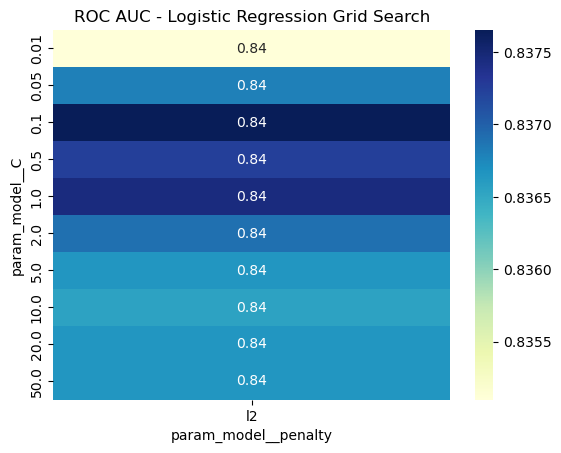

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# =======================
# 1️⃣  Estrazione e setup
# =======================
train_df = extract_all(train_list, True)

X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

#per chiarezza divisione delle features
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
         'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

#boost_cols= [ 'dif_boost_atk', 'dif_boost_def', 'dif_boost_spa','dif_boost_spd', 'dif_boost_spe']

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER','p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level','move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp',
       'eff_p1_on_p2','eff_p2_on_p1','type_adv_diff'] 

#features da non scalare: contatori
temp=status_cols+effect_cols+type_cols+move_cat_cols+move_type_cols
exclude=['battle_id','player_won']+temp

features = [col for col in train_df.columns if col not in exclude]

# =======================
# 2️⃣  Pipeline
# =======================
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# =======================
# 3️⃣  Griglia iperparametri
# =======================
param_grid = [
    {
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs', 'saga'],
        'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50]
    }#,
    #{
    #    'model__penalty': ['l1'],
    #    'model__solver': ['liblinear', 'saga'],
    #    'model__C': [0.05, 0.1, 0.5, 1, 2, 5, 10]
    #},
    #{
    #    'model__penalty': ['elasticnet'],
    #    'model__solver': ['saga'],
    #    'model__C': [0.1, 0.5, 1, 5, 10],
    #    'model__l1_ratio': [0.2, 0.4, 0.6, 0.8]
    #}
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_logreg = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    refit=True,
    return_train_score=True,
    verbose=2
)

# =======================
# 4️⃣  Esecuzione GridSearch
# =======================
print("Eseguo la ricerca dei migliori iperparametri...\n")
grid_logreg.fit(X, y)

# =======================
# 5️⃣  Analisi risultati
# =======================
cv_results_df = pd.DataFrame(grid_logreg.cv_results_)

# Mostra le top 10 combinazioni ordinate per performance
print("\n=== Top 10 combinazioni per ROC AUC ===")
cols = ["mean_test_score", "std_test_score", "rank_test_score", "params"]
print(cv_results_df[cols].sort_values(by="mean_test_score", ascending=False).head(10))

# Riga e parametri migliori
best_row = cv_results_df.loc[[grid_logreg.best_index_]]
best_params = grid_logreg.best_params_
best_score = grid_logreg.best_score_

print("\n=== Miglior combinazione trovata ===")
print(best_row[["params", "mean_test_score", "std_test_score", "rank_test_score"]])
print("\nBest hyperparameters:", best_params)
print(f"Best ROC AUC score: {best_score:.4f}")

# =======================
# 6️⃣  Valutazione modello finale
# =======================
best_model = grid_logreg.best_estimator_

y_pred = best_model.predict(X)
y_prob = best_model.predict_proba(X)[:, 1]

print("\n=== Metriche sul dataset completo ===")
print(f"Accuracy : {accuracy_score(y, y_pred):.4f}")
print(f"Precision: {precision_score(y, y_pred):.4f}")
print(f"Recall   : {recall_score(y, y_pred):.4f}")
print(f"F1-score : {f1_score(y, y_pred):.4f}")
print(f"ROC AUC  : {roc_auc_score(y, y_prob):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# =======================
# 7️⃣  Visualizzazione (opzionale)
# =======================
try:
    pivot_df = cv_results_df.pivot_table(
        index="param_model__C",
        columns="param_model__penalty",
        values="mean_test_score"
    )
    sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
    plt.title("ROC AUC - Logistic Regression Grid Search")
    plt.show()
except Exception as e:
    print("Impossibile generare la heatmap:", e)


In [22]:
#####################  Train new model-dynamics (coerente con Grid) ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# === Estrai dataset ===
train_df = extract_all(train_list, True)
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione gruppi di feature ===
type_cols = [ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
              'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
              'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
              'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
              'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
              'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols = ["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]
effect_cols = ["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
               "p1_effect_transform","p2_effect_transform"]
boost_cols = [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
               'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
               'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe']
move_type_cols = [ 'p1_movetype_ELECTRIC', 'p1_movetype_FIGHTING', 'p1_movetype_FIRE',
                   'p1_movetype_FLYING','p1_movetype_GHOST', 'p1_movetype_GRASS',
                   'p1_movetype_GROUND','p1_movetype_ICE', 'p1_movetype_NORMAL',
                   'p1_movetype_POISON','p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
                   'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
                   'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
                   'p2_movetype_GROUND','p2_movetype_ICE', 'p2_movetype_NORMAL',
                   'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
                   'p2_movetype_WATER']
move_cat_cols = ['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
                 'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols = ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
              'diff_base_spa', 'diff_base_spd','diff_base_spe', 'diff_level',
              'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp',
              'eff_p1_on_p2','eff_p2_on_p1','type_adv_diff']

# === Gestione colonne ===
temp = status_cols + effect_cols + type_cols + move_cat_cols + move_type_cols
exclude = ['battle_id', 'player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]
print(f"Numero feature scalate: {len(features)} | Non scalate: {len(temp)}")

# === Preprocessing e modello finale ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='lbfgs',
        max_iter=5000,
        random_state=42))
])

# === Cross-validation identica a quella del Grid ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Calcolo dell'accuracy media (come il Grid) ===
scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print("\n=== Accuracy stimata con la stessa CV del Grid ===")
print("Accuracy per fold:", np.round(scores, 4))
print(f"Media: {scores.mean():.4f} | Dev std: {scores.std():.4f}")

# === Fit finale sul dataset intero per analisi di metriche ===
pipe.fit(X, y)
y_pred = pipe.predict(X)
y_prob = pipe.predict_proba(X)[:, 1]

print("\n=== Metriche sul dataset completo (solo a scopo diagnostico) ===")
print(f"Accuracy : {accuracy_score(y, y_pred):.4f}")
print(f"Precision: {precision_score(y, y_pred):.4f}")
print(f"Recall   : {recall_score(y, y_pred):.4f}")
print(f"F1-score : {f1_score(y, y_pred):.4f}")
print(f"ROC AUC  : {roc_auc_score(y, y_prob):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_def',
       'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level'],
      dtype='object')
Dinamica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass'

SUBMISSION

In [23]:
#####################  Train new model-dynamics ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list,True)
test_df = extract_all(test_list,False)  # <-- Assicurati di avere anche il test_list definito

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

#per chiarezza divisione delle features
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
         'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

#boost_cols= [ 'dif_boost_atk', 'dif_boost_def', 'dif_boost_spa','dif_boost_spd', 'dif_boost_spe']

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER','p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level','move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp',
       'eff_p1_on_p2','eff_p2_on_p1','type_adv_diff'] 

#features da non scalare: contatori
temp=type_cols+status_cols+effect_cols+move_type_cols+move_cat_cols
exclude=['battle_id','player_won']+temp

features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_def',
       'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level'],
      dtype='object')
Dinamica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass'

C:\Users\axelr\AppData\Local\Temp\ipykernel_16484\2397554038.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_full=tipiSquadra2(agg_full.fillna(0),unique_types)


Statistica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_def',
       'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level'],
      dtype='object')
Dinamica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_d

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

SUBMISSION BEST

In [28]:
#####################  Train new model-dynamics (FINAL GRID MODEL) ##########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === 1️⃣ Caricamento dati ===
train_df = extract_all(train_list, True)
test_df = extract_all(test_list, False)

# === 2️⃣ Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === 3️⃣ Definizione gruppi di feature ===
type_cols = [ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
              'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
              'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
              'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
              'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
              'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols = ["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]
effect_cols = ["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
               "p1_effect_transform","p2_effect_transform"]
boost_cols = [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
               'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
               'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe']
move_type_cols = [ 'p1_movetype_ELECTRIC','p1_movetype_FIGHTING','p1_movetype_FIRE',
                   'p1_movetype_FLYING','p1_movetype_GHOST','p1_movetype_GRASS',
                   'p1_movetype_GROUND','p1_movetype_ICE','p1_movetype_NORMAL',
                   'p1_movetype_POISON','p1_movetype_PSYCHIC','p1_movetype_ROCK','p1_movetype_WATER',
                   'p2_movetype_ELECTRIC','p2_movetype_FIGHTING','p2_movetype_FIRE',
                   'p2_movetype_FLYING','p2_movetype_GHOST','p2_movetype_GRASS',
                   'p2_movetype_GROUND','p2_movetype_ICE','p2_movetype_NORMAL',
                   'p2_movetype_POISON','p2_movetype_PSYCHIC','p2_movetype_ROCK','p2_movetype_WATER']
move_cat_cols = ['p1_movecat_PHYSICAL','p1_movecat_SPECIAL','p1_movecat_STATUS',
                 'p2_movecat_PHYSICAL','p2_movecat_SPECIAL','p2_movecat_STATUS']
match_cols = ['hp_diff_mean','diff_base_hp','diff_base_atk','diff_base_def',
              'diff_base_spa','diff_base_spd','diff_base_spe','diff_level',
              'move_basepow_diff_mean','move_acc_diff_mean','somma_diff_hp',
              'eff_p1_on_p2','eff_p2_on_p1','type_adv_diff']

# === 4️⃣ Gestione colonne da scalare e non ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id', 'player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

print(f"Feature scalate: {len(features)} | Feature non scalate: {len(temp)}")

# === 5️⃣ Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === 6️⃣ Pipeline finale con i migliori iperparametri del GridSearch ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='lbfgs',
        max_iter=5000,
        random_state=42))
])

# === 7️⃣ Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === 8️⃣ Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === 9️⃣ Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("\n=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === 🔟 Fit finale sul training completo ===
pipe.fit(X, y)

# === 11️⃣ Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === 12️⃣ Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_grid.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Statistica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_def',
       'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level'],
      dtype='object')
Dinamica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass'

C:\Users\axelr\AppData\Local\Temp\ipykernel_16484\2397554038.py:63: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_full=tipiSquadra2(agg_full.fillna(0),unique_types)


Statistica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_def',
       'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level'],
      dtype='object')
Dinamica:  Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_poison',
       'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric',
       'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice',
       'p2_normal', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water',
       'player_won', 'diff_base_hp', 'diff_base_atk', 'diff_base_d

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [ ]:
#####################  Train new model-dynamics (FINAL GRID MODEL) ##########################
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === 1️⃣ Caricamento dati ===
train_df = extract_all(train_list, True)
test_df = extract_all(test_list, False)

# === 2️⃣ Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === 3️⃣ Definizione gruppi di feature ===
type_cols = [ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
              'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
              'p1_normal', 'p1_poison', 'p1_psychic', 'p1_rock',
              'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
              'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
              'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols = ["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]
effect_cols = ["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
               "p1_effect_transform","p2_effect_transform"]
boost_cols = [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
               'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
               'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe']
move_type_cols = [ 'p1_movetype_ELECTRIC','p1_movetype_FIGHTING','p1_movetype_FIRE',
                   'p1_movetype_FLYING','p1_movetype_GHOST','p1_movetype_GRASS',
                   'p1_movetype_GROUND','p1_movetype_ICE','p1_movetype_NORMAL',
                   'p1_movetype_POISON','p1_movetype_PSYCHIC','p1_movetype_ROCK','p1_movetype_WATER',
                   'p2_movetype_ELECTRIC','p2_movetype_FIGHTING','p2_movetype_FIRE',
                   'p2_movetype_FLYING','p2_movetype_GHOST','p2_movetype_GRASS',
                   'p2_movetype_GROUND','p2_movetype_ICE','p2_movetype_NORMAL',
                   'p2_movetype_POISON','p2_movetype_PSYCHIC','p2_movetype_ROCK','p2_movetype_WATER']
move_cat_cols = ['p1_movecat_PHYSICAL','p1_movecat_SPECIAL','p1_movecat_STATUS',
                 'p2_movecat_PHYSICAL','p2_movecat_SPECIAL','p2_movecat_STATUS']
match_cols = ['hp_diff_mean','diff_base_hp','diff_base_atk','diff_base_def',
              'diff_base_spa','diff_base_spd','diff_base_spe','diff_level',
              'move_basepow_diff_mean','move_acc_diff_mean','somma_diff_hp',
              'eff_p1_on_p2','eff_p2_on_p1','type_adv_diff']

# === 4️⃣ Gestione colonne da scalare e non ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id', 'player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

print(f"Feature scalate: {len(features)} | Feature non scalate: {len(temp)}")

# === 5️⃣ Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === 6️⃣ Pipeline finale con i migliori iperparametri del GridSearch ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='lbfgs',
        max_iter=5000,
        random_state=42))
])

# === 7️⃣ Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === 8️⃣ Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === 9️⃣ Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("\n=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === 🔟 Fit finale sul training completo ===
pipe.fit(X, y)

# === 11️⃣ Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === 12️⃣ Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission_grid.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))
